In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import numpy as np
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.7.3
['/home/adria/Documents/Documents/TUM/dlfs/libdl/python', '/home/adria/anaconda3/lib/python37.zip', '/home/adria/anaconda3/lib/python3.7', '/home/adria/anaconda3/lib/python3.7/lib-dynload', '', '/home/adria/anaconda3/lib/python3.7/site-packages', '/home/adria/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/Documents/TUM/dlfs/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb

In [3]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage import io
imTrain = io.imread(os.getcwd() + '/data/train-volume.tif')
NumImages = 30;
ImageDim = 512 * 512
imsTrain = np.reshape(imTrain, (NumImages, ImageDim)).transpose() 
imsTrain = imsTrain.astype(np.double)/255

lbTrain = io.imread(os.getcwd() + '/data/train-labels.tif')
lbsTrain = np.reshape(lbTrain, (NumImages, ImageDim)).transpose()
enc = OneHotEncoder(categories='auto')
enc.fit(lbsTrain.reshape(-1, 1))
lbsTrainOneHot = np.zeros((ImageDim,NumImages * 2))
for idx in range(0,NumImages):
    lbsTrainOneHot[:,2*idx:(2*idx +2)] = enc.transform(lbsTrain[:,idx].reshape(-1, 1)).toarray()
idx = 0
someIm0 = imsTrain[:,0];
someLb0 = lbsTrain[:,0];
someIm1 = imsTrain[:,1];
someLb1 = lbsTrain[:,1];

In [4]:
print("Values per Image:", imsTrain.shape[0])
print("Number of images for training:", imsTrain.shape[1])

print("Values per  Label Image:", lbsTrainOneHot.shape[0])
print("Number of images for Label training:", lbsTrainOneHot.shape[1])
plt.ion()
inputVar = 30 # change to visualize
while inputVar < 30:
    f = plt.figure(figsize=(20,5))
    f.suptitle('Original image and One Hot Labels', fontsize=16)
    plt.subplot(131)
    plt.imshow(np.reshape(imsTrain[:,inputVar],(512,512)), interpolation='nearest', cmap='gray')
    plt.subplot(132)
    plt.imshow(np.reshape(lbsTrainOneHot[:,2 * inputVar],(512,512)), interpolation='nearest', cmap='gray')
    plt.subplot(133)
    plt.imshow(np.reshape(lbsTrainOneHot[:,2 * inputVar + 1],(512,512)), interpolation='nearest', cmap='gray')
    plt.show()
    inputVar = int(input("Next Index? (Press 30 or larger escape)."))# wait for input from the user

Values per Image: 262144
Number of images for training: 30
Values per  Label Image: 262144
Number of images for Label training: 60


In [5]:
labelDepth = 2
#segSimple = pyb.SegmentationExample1(512,512,1,convolutionDepth,labelDepth)
segSimple = pyb.SegmentationExample8(512,512,1,labelDepth)

Conv In Depth: 1 In Height: 512 In Width: 512 Out Depth: 8 Out Height: 512 Out Width: 512
Conv In Depth: 8 In Height: 512 In Width: 512 Out Depth: 16 Out Height: 512 Out Width: 512
Maxp In Depth: 16 In Height: 512 In Width: 512 Out Depth: 16 Out Height: 256 Out Width: 256
Conv In Depth: 16 In Height: 256 In Width: 256 Out Depth: 32 Out Height: 256 Out Width: 256
Conv In Depth: 32 In Height: 256 In Width: 256 Out Depth: 32 Out Height: 256 Out Width: 256
Maxp In Depth: 32 In Height: 256 In Width: 256 Out Depth: 32 Out Height: 128 Out Width: 128
Tran In Depth: 32 In Height: 128 In Width: 128 Out Depth: 32 Out Height: 256 Out Width: 256
Conv In Depth: 32 In Height: 256 In Width: 256 Out Depth: 16 Out Height: 256 Out Width: 256
Tran In Depth: 16 In Height: 256 In Width: 256 Out Depth: 8 Out Height: 512 Out Width: 512
Conv In Depth: 8 In Height: 512 In Width: 512 Out Depth: 2 Out Height: 512 Out Width: 512


In [6]:
segSimple.Train(imsTrain,lbsTrainOneHot,0.000001,8)
segSimpleOut = segSimple.Test(imsTrain[:,0])

Loss of a given sample at epoch: 0
0.468165
Loss of a given sample at epoch: 1
0.373579
Loss of a given sample at epoch: 2
0.379775
Loss of a given sample at epoch: 3
0.318468
Loss of a given sample at epoch: 4
0.371498
Loss of a given sample at epoch: 5
0.396621
Loss of a given sample at epoch: 6
0.292413
Loss of a given sample at epoch: 7
0.310878
testing:
262144rows


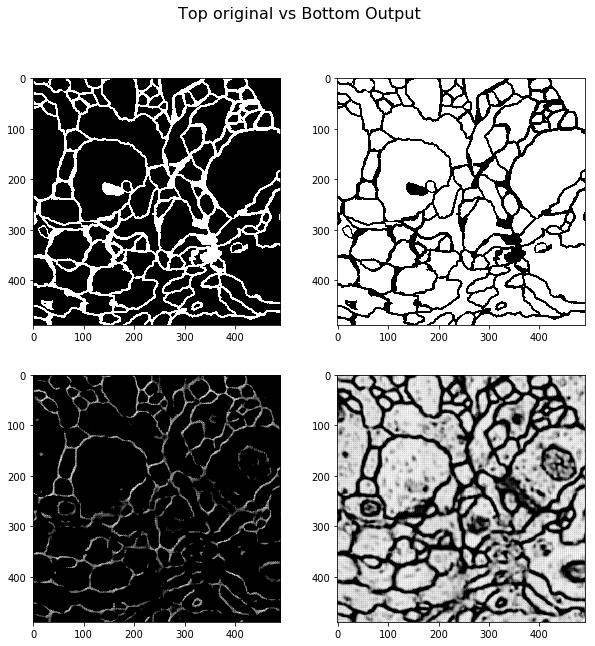

In [7]:
segSimpleOut2 = segSimpleOut.copy()
segSimpleOut2[segSimpleOut >= 0.5] = 1.0
segSimpleOut2[segSimpleOut < 0.5] = 0.0

f = plt.figure(figsize=(10,10))
f.suptitle('Top original vs Bottom Output', fontsize=16)
plt.subplot(221)
plt.imshow(np.reshape(lbsTrainOneHot[:,0],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(222)
plt.imshow(np.reshape(lbsTrainOneHot[:,1],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(223)
plt.imshow(np.reshape(segSimpleOut[:,0],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(224)
plt.imshow(np.reshape(segSimpleOut[:,1],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.show()

In [8]:
segSimpleOut.tolist()

[[0.0, 0.23865136472775977],
 [0.0, 0.26498693486699265],
 [0.0, 1.1545598811946824],
 [0.0, 1.2236560008619601],
 [0.0, 1.4177777159780975],
 [0.0, 0.9988885297062584],
 [0.0, 1.3325096981704854],
 [0.0, 1.0312610993945799],
 [0.0, 0.96491578833023],
 [0.0, 0.5862474877723298],
 [0.0, 0.6647197825093717],
 [0.0, 0.525459540085341],
 [0.0, 0.9266246928653173],
 [0.0, 0.8403452552288138],
 [0.0, 1.0541129107068279],
 [0.0, 0.7611536052424669],
 [0.0, 1.0784868998679407],
 [0.0, 0.8734036234720516],
 [0.0, 1.4155876683198536],
 [0.0, 1.0740125191326289],
 [0.0, 1.2845701066775226],
 [0.0, 0.9774803127477283],
 [0.0, 1.3955512575396702],
 [0.0, 1.1100394023923439],
 [0.0, 1.0192666646081758],
 [0.0, 0.6062177313709207],
 [0.0, 0.7598565608667011],
 [0.0, 0.4944805882867942],
 [0.0, 0.5630834788016811],
 [0.0, 0.281061226043244],
 [0.0, 0.633328127929203],
 [0.0, 0.4483134102795471],
 [0.0, 0.8493007417340972],
 [0.0, 0.8052764728537574],
 [0.0, 1.4589685500971594],
 [0.0, 1.19330477221006